## Jupiters around M dwarfs

In [1]:
!python --version

Python 2.7.13 :: Continuum Analytics, Inc.


In [27]:
#for Pyton 2.7
import urllib2
import time

url = 'http://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets'
params = 'pl_hostname,pl_letter,pl_discmethod,pl_bmassj,pl_radj,pl_orbsmax,pl_orbper,st_spstr,st_teff'
full_url= url+'&select='+ params

response = urllib2.urlopen(full_url)
#response = urllib2.urlopen(url)
html = response.read()

outpath = 'confirmed_planets_{}.csv'.format(time.strftime("%Y%m%d")) #include date of download

print("retrieving URL: {}".format(url))

with open(outpath,'wb') as f:
     f.write(html)
print("created file: {}".format(outpath))

retrieving URL: http://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets
created file: confirmed_planets_20170602.csv


In [21]:
import pandas as pd
df = pd.read_csv(outpath)
df.head()

,pl_hostname,pl_letter,pl_discmethod,pl_bmassj,pl_radj,pl_orbsmax,pl_orbper,st_spstr,st_teff
0,Kepler-125,b,Transit,NaN,0.211,0.041,4.164389,NaN,3810.0
1,Kepler-126,b,Transit,NaN,0.136,0.099,10.495711,NaN,6239.0
2,Kepler-126,c,Transit,NaN,0.141,0.162,21.869741,NaN,6239.0
3,Kepler-126,d,Transit,NaN,0.223,0.448,100.283134,NaN,6239.0
4,Kepler-127,c,Transit,NaN,0.237,0.200,29.393195,NaN,6106.0


In [23]:
df['pl_discmethod'].value_counts()

Transit                          2731
Radial Velocity                   632
Microlensing                       46
Imaging                            43
Transit Timing Variations          15
Eclipse Timing Variations           8
Orbital Brightness Modulation       6
Pulsar Timing                       5
Pulsation Timing Variations         2
Astrometry                          1
Name: pl_discmethod, dtype: int64

In [24]:
idx1 = df['st_spstr'] == 'Transit'
df_transit = df[idx1]

In [33]:
len(df_transit['st_spstr'].dropna())

314

only 314 has spectral type classification so I'll manually [classify](https://en.wikipedia.org/wiki/Main_sequence) them based on mass, radius, and temp.

In [51]:
O = df_transit.query('pl_radj > 18 and 30000 < st_teff<38000')
B = df_transit.query('3.8 < pl_radj < 7.4 and 16400 < st_teff<30000')
A = df_transit.query('1.7 < pl_radj < 2.5 and 8620 < st_teff<10800')
F = df_transit.query('1.2 < pl_radj < 1.3 and 6540 < st_teff<7240')
G = df_transit.query('0.93 < pl_radj < 1 and 5240 < st_teff<6540')
K = df_transit.query('0.74 < pl_radj < 0.85 and 4410 < st_teff<5240')
M = df_transit.query('0.13 < pl_radj < 0.63 and 2660 < st_teff<3920')

In [52]:
len(df_transit.dropna())

231

## solar-type

In [61]:
G = df_transit.query('0.9<pl_radj<1 and 5600<st_teff<6000')

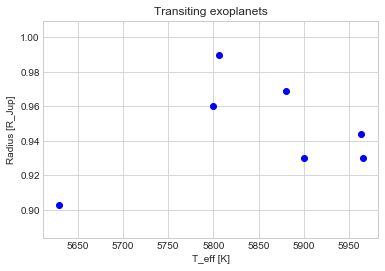

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

#create an empty figure
fig, ax=plt.subplots(nrows=3,ncols=2, figsize=(10,10))

for 
    st_type
    ax[].scatter(x=st_type['st_teff'], y=st_type['pl_radj'], color='blue')
    #below is for putting the labels on x and y-axes
    plt.xlabel('T_eff [K]')
    plt.ylabel('Radius [R_Jup]')
    #to add title
    plt.title('Transiting exoplanets')
    #to reveal plot
    plt.show()

## red dwarfs

In [65]:
#red dwarfs ~ 0.075 - 0.50 M_sun; T < 4,000 K
M = df_transit.query('2660 < st_teff<3920')

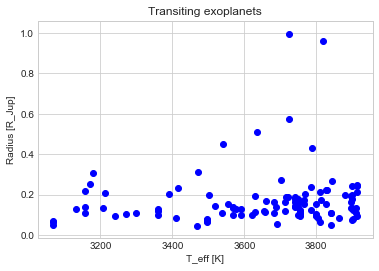

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

#create an empty figure
fig=plt.figure()

plt.scatter(x=M['st_teff'], y=M['pl_radj'], color='blue')
#below is for putting the labels on x and y-axes
plt.xlabel('T_eff [K]')
plt.ylabel('Radius [R_Jup]')
#to add title
plt.title('Transiting exoplanets')
#to reveal plot
plt.show()

In [67]:
len(M)

109

In [68]:
M_unique = M.query('0.6<pl_radj<1')

In [69]:
M_unique

,pl_hostname,pl_letter,pl_discmethod,pl_bmassj,pl_radj,pl_orbsmax,pl_orbper,st_spstr,st_teff
104,HATS-6,b,Transit,0.319,0.998,0.03623,3.325273,M1 V,3724.0
339,Kepler-45,b,Transit,0.505,0.960,0.03000,2.455239,M,3820.0
